#Extracting and Organising data

In [1]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1K8Nbeof6Pb0ebvL-OZOQPRqxgZNEjqzm'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('dataset-dataset.csv') 
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

ModuleNotFoundError: No module named 'google.colab'

# Exploring data



In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
# train_file_path = "/home/somayaji/school/data/raw/dataset - dataset.csv"
# raw_file_path = "/content/dataset - dataset.csv"
# url= "https://drive.google.com/file/d/1nwFfMOJgzEc15T0vBvd4nNd94Z_5J2rL/edit"
# url="https://docs.google.com/spreadsheets/d/1T-VoYEbxBrmUgciujk5I8e208e7tRDVJvEcNpcMJZuE/edit#gid=529810701"
# url = "https://docs.google.com/spreadsheets/d/1T-VoYEbxBrmUgciujk5I8e208e7tRDVJvEcNpcMJZuE/edit?usp=sharing"
url= "https://drive.google.com/open?id=1K8Nbeof6Pb0ebvL-OZOQPRqxgZNEjqzm"

In [4]:
df=pd.read_csv('dataset-dataset.csv')



FileNotFoundError: [Errno 2] File dataset-dataset.csv does not exist: 'dataset-dataset.csv'

In [ ]:
df.head(18)

#Processing data


In [0]:

type(df)

pandas.core.frame.DataFrame

In [0]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Roll                                     57 non-null     float64
 1   CT-1 (Marks: 20)                         57 non-null     object 
 2   CT-2 (Marks: 20)                         57 non-null     object 
 3   CT-3 (Marks: 20)                         57 non-null     object 
 4   CT-4 (Marks: 20)                         57 non-null     object 
 5   Class Test (Total of best 3, Marks: 60)  57 non-null     object 
 6   Attendance (Marks: 15)                   57 non-null     object 
 7   Observation (Marks: 15)                  57 non-null     object 
 8   Total (Marks: 90)                        57 non-null     object 
 9   Exam Mark (105)                          54 non-null     float64
 10  Exam Mark (105).1                        54 non-null

In [0]:
df.loc[17,1:12]=None
df.loc[35,1:12]=None
df.loc[53,1:12]=None


In [0]:
#delete rows with all null values(as there is no such roll number existing)
df =df.dropna(how='all', axis=0)

In [0]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 62
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Roll                                     57 non-null     float64
 1   CT-1 (Marks: 20)                         54 non-null     object 
 2   CT-2 (Marks: 20)                         54 non-null     object 
 3   CT-3 (Marks: 20)                         54 non-null     object 
 4   CT-4 (Marks: 20)                         54 non-null     object 
 5   Class Test (Total of best 3, Marks: 60)  54 non-null     object 
 6   Attendance (Marks: 15)                   54 non-null     object 
 7   Observation (Marks: 15)                  54 non-null     object 
 8   Total (Marks: 90)                        54 non-null     object 
 9   Exam Mark (105)                          54 non-null     float64
 10  Exam Mark (105).1                        54 non-null

In [0]:
df.head(36)

,Roll,CT-1 (Marks: 20),CT-2 (Marks: 20),CT-3 (Marks: 20),CT-4 (Marks: 20),"Class Test (Total of best 3, Marks: 60)",Attendance (Marks: 15),Observation (Marks: 15),Total (Marks: 90),Exam Mark (105),Exam Mark (105).1,Mark total 300
0,2.0,12.5,15,14,18,47,15,13.5,75.5,45.0,46.5,167.0
1,3.0,9,10,17,11,38,15,13.5,66.5,28.0,44.0,138.5
2,4.0,10,15.5,12.5,6.5,38,15,13.5,66.5,26.5,43.0,136.0
3,5.0,14,14,18,0,46,15,15,76,46.0,44.0,166.0
4,6.0,14.5,15.5,15,15.5,46,15,15,76,26.0,74.5,176.5
5,7.0,13.5,13,18,16.5,48,15,15,78,77.0,70.0,225.0
6,8.0,14,16,14,16.5,46.5,15,15,76.5,69.0,79.5,225.0
7,9.0,11,17,15.5,20,52.5,15,12,79.5,49.0,67.0,195.5
8,10.0,8,15,14,8,37,15,15,67,26.0,38.5,131.5
9,11.0,11.5,14.5,7,14.5,40.5,15,13.5,69,40.0,41.0,150.0


Repeated headings are removed.
null rows also are removed 

In [0]:
print (np.arange(len(df.index)))
index = np.arange(len(df.index))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56]


In [0]:
#adding index
# n = ['Index']
# df.index = pd.MultiIndex.from_arrays(np.arange(len(df.index)), names= n)
df['Index']=index
df.head()
#just added for my convenience:P



,Roll,CT-1 (Marks: 20),CT-2 (Marks: 20),CT-3 (Marks: 20),CT-4 (Marks: 20),"Class Test (Total of best 3, Marks: 60)",Attendance (Marks: 15),Observation (Marks: 15),Total (Marks: 90),Exam Mark (105),Exam Mark (105).1,Mark total 300,Index
0,2.0,12.5,15,14,18,47,15,13.5,75.5,45.0,46.5,167.0,0
1,3.0,9,10,17,11,38,15,13.5,66.5,28.0,44.0,138.5,1
2,4.0,10,15.5,12.5,6.5,38,15,13.5,66.5,26.5,43.0,136.0,2
3,5.0,14,14,18,0,46,15,15,76,46.0,44.0,166.0,3
4,6.0,14.5,15.5,15,15.5,46,15,15,76,26.0,74.5,176.5,4


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 62
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Roll                                     57 non-null     float64
 1   CT-1 (Marks: 20)                         54 non-null     object 
 2   CT-2 (Marks: 20)                         54 non-null     object 
 3   CT-3 (Marks: 20)                         54 non-null     object 
 4   CT-4 (Marks: 20)                         54 non-null     object 
 5   Class Test (Total of best 3, Marks: 60)  54 non-null     object 
 6   Attendance (Marks: 15)                   54 non-null     object 
 7   Observation (Marks: 15)                  54 non-null     object 
 8   Total (Marks: 90)                        54 non-null     object 
 9   Exam Mark (105)                          54 non-null     float64
 10  Exam Mark (105).1                        54 non-null

#Data Cleaning

In [0]:


#data cleaning
df.columns = ['Roll','CT1','CT2','CT3','CT4','CTtotal','Attendance','Observation','Total90','EM1','EM2','Total300','Index',]

In [0]:
#numerical features
#centrality measures
print("Mean total marks (300): {0}".format(df.Total300.mean()))
print("Median total marks (300): {0}".format(df.Total300.median()))

Mean total marks (300): 165.32407407407408
Median total marks (300): 165.25


In [0]:
df.describe(include='all')

,Roll,CT1,CT2,CT3,CT4,CTtotal,Attendance,Observation,Total90,EM1,EM2,Total300,Index
count,57.000000,54,54,54,54,54,54,54,54,54.000000,54.000000,54.000000,57.000000
unique,NaN,27,17,20,24,33,3,6,32,NaN,NaN,NaN,NaN
top,NaN,12.5,15,14,0,43.5,15,13.5,73.5,NaN,NaN,NaN,NaN
freq,NaN,5,7,9,11,5,49,25,5,NaN,NaN,NaN,NaN
mean,32.736842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.972222,57.537037,165.324074,28.000000
std,18.657176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.312995,20.441092,35.735290,16.598193
min,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,52.000000,0.000000
25%,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.000000,43.250000,139.750000,14.000000
50%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,59.750000,165.250000,28.000000
75%,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.000000,73.000000,184.125000,42.000000


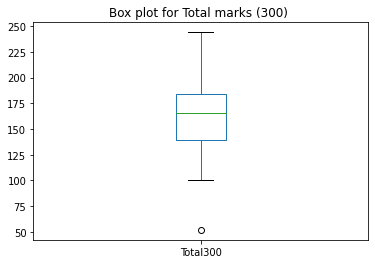

In [0]:
df.Total300.plot(kind="box", title ='Box plot for Total marks (300) ');

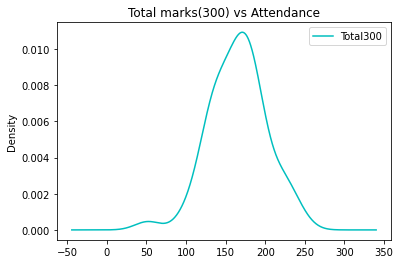

In [0]:
#not possible to use scatter plot for bivariate distribution as values are in float

df.plot.kde(x='Attendance', y='Total300', color='c', title='Total marks(300) vs Attendance', rot=0);

In [0]:
import matplotlib.pyplot as plt

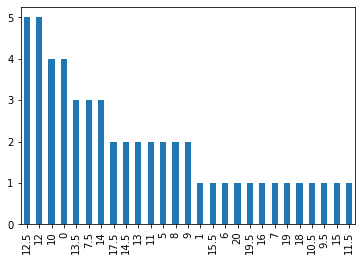

In [0]:
df['CT1'].value_counts().plot(kind='bar')
plt.show()

In [0]:
df.CT1.median()


12.0

In [0]:
# df.CT1.mean()
#commenting for now(getting error)

In [0]:
#replace missing values with median
col='CT1'
ctmed= df.CT1.median()
df.CT1.fillna((df.CT1.median().astype(int)), inplace=True)


In [0]:
df.head(18)

,Roll,CT1,CT2,CT3,CT4,CTtotal,Attendance,Observation,Total90,EM1,EM2,Total300,Index
0,2.0,12.5,15,14,18,47,15,13.5,75.5,45.0,46.5,167.0,0
1,3.0,9,10,17,11,38,15,13.5,66.5,28.0,44.0,138.5,1
2,4.0,10,15.5,12.5,6.5,38,15,13.5,66.5,26.5,43.0,136.0,2
3,5.0,14,14,18,0,46,15,15,76,46.0,44.0,166.0,3
4,6.0,14.5,15.5,15,15.5,46,15,15,76,26.0,74.5,176.5,4
5,7.0,13.5,13,18,16.5,48,15,15,78,77.0,70.0,225.0,5
6,8.0,14,16,14,16.5,46.5,15,15,76.5,69.0,79.5,225.0,6
7,9.0,11,17,15.5,20,52.5,15,12,79.5,49.0,67.0,195.5,7
8,10.0,8,15,14,8,37,15,15,67,26.0,38.5,131.5,8
9,11.0,11.5,14.5,7,14.5,40.5,15,13.5,69,40.0,41.0,150.0,9


In [0]:
df.Total300.median()

165.25

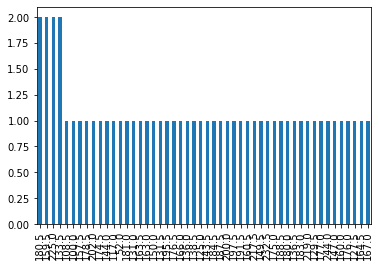

In [0]:
df['Total300'].value_counts().plot(kind='bar')
plt.show()

In [0]:
set(df.columns)

{'Attendance',
 'CT1',
 'CT2',
 'CT3',
 'CT4',
 'CTtotal',
 'EM1',
 'EM2',
 'Index',
 'Observation',
 'Roll',
 'Total300',
 'Total90'}

Applying this to all other fields...

In [0]:
type(df.Attendance.iloc[2])

str

In [0]:
#so there's a problem with the attendance values. They are strings and not int or float

In [0]:
df['Attendance'] = pd.to_numeric(df['Attendance'], downcast='float') 

In [0]:
df['CT1'] = pd.to_numeric(df['CT1'], downcast='float') 

In [0]:
type(df.Attendance.iloc[2])

numpy.float32

In [0]:
df.head()

,Roll,CT1,CT2,CT3,CT4,CTtotal,Attendance,Observation,Total90,EM1,EM2,Total300,Index
0,2.0,12.5,15,14,18,47,15.0,13.5,75.5,45.0,46.5,167.0,0
1,3.0,9,10,17,11,38,15.0,13.5,66.5,28.0,44.0,138.5,1
2,4.0,10,15.5,12.5,6.5,38,15.0,13.5,66.5,26.5,43.0,136.0,2
3,5.0,14,14,18,0,46,15.0,15,76,46.0,44.0,166.0,3
4,6.0,14.5,15.5,15,15.5,46,15.0,15,76,26.0,74.5,176.5,4


In [0]:
type(df.Index.iloc[3])

numpy.int64

In [0]:
type(df.Total300.iloc[2])

numpy.float64

In [0]:
# applying float value to all other columns...

#and also filling null values with median...

In [0]:
for col in df:
  print(col)
  df_col = df[col]
  df[col] = pd.to_numeric(df[col], downcast='float') 

  # med =int(round(df_col.median()))
  #that was to round off
  
  med= df_col.median()
  # med =  med.astype(int)
  df_col.fillna(int(med), inplace =  True)

Roll
CT1
CT2
CT3
CT4
CTtotal
Attendance
Observation
Total90
EM1
EM2
Total300
Index


In [0]:
#for somereason the values are not being converted to float in the loop, so doing manually,
df['CT2'] = pd.to_numeric(df['CT2'], downcast='float')
df['CTtotal'] = pd.to_numeric(df['CTtotal'], downcast='float')
df['Observation'] = pd.to_numeric(df['Observation'], downcast='float')
df['Total90'] = pd.to_numeric(df['Total90'], downcast='float')

In [0]:
# list={'CT1','CT2','CT3','CT4','CTtotal','Attendance','Observation','Total90','EM1','EM2','Total300'}
# for col in list:
#   df_col = df[df.columns == col]
#   df_col.fillna([df_col.mean()], inplace=True)
 
 #commenting this for now(there's an alternative way above)

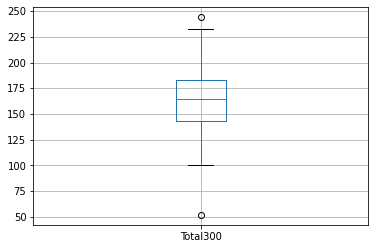

In [0]:
df[(df.Total300 != -99) & df.Total300.notnull()].boxplot('Total300');

In [0]:
df.head(36)

,Roll,CT1,CT2,CT3,CT4,CTtotal,Attendance,Observation,Total90,EM1,EM2,Total300,Index
0,2.0,12.5,15,14,18,47,15.0,13.5,75.5,45.0,46.5,167.0,0
1,3.0,9.0,10,17,11,38,15.0,13.5,66.5,28.0,44.0,138.5,1
2,4.0,10.0,15.5,12.5,6.5,38,15.0,13.5,66.5,26.5,43.0,136.0,2
3,5.0,14.0,14,18,0,46,15.0,15,76,46.0,44.0,166.0,3
4,6.0,14.5,15.5,15,15.5,46,15.0,15,76,26.0,74.5,176.5,4
5,7.0,13.5,13,18,16.5,48,15.0,15,78,77.0,70.0,225.0,5
6,8.0,14.0,16,14,16.5,46.5,15.0,15,76.5,69.0,79.5,225.0,6
7,9.0,11.0,17,15.5,20,52.5,15.0,12,79.5,49.0,67.0,195.5,7
8,10.0,8.0,15,14,8,37,15.0,15,67,26.0,38.5,131.5,8
9,11.0,11.5,14.5,7,14.5,40.5,15.0,13.5,69,40.0,41.0,150.0,9


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 62
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Roll         57 non-null     float64
 1   CT1          57 non-null     float32
 2   CT2          57 non-null     object 
 3   CT3          57 non-null     object 
 4   CT4          57 non-null     object 
 5   CTtotal      57 non-null     object 
 6   Attendance   57 non-null     float32
 7   Observation  57 non-null     object 
 8   Total90      57 non-null     object 
 9   EM1          57 non-null     float64
 10  EM2          57 non-null     float64
 11  Total300     57 non-null     float64
 12  Index        57 non-null     int64  
dtypes: float32(2), float64(4), int64(1), object(6)
memory usage: 5.8+ KB


so data is cleaned and ready to be trained and tested!


In [0]:
import matplotlib.pyplot as plt

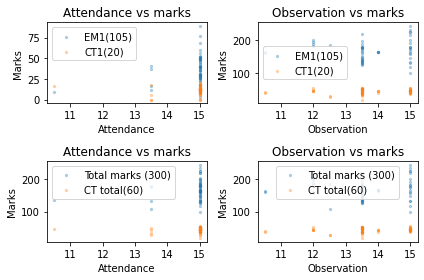

In [0]:
plt.subplot(221)
plt.title('Attendance vs marks')
plt.scatter( df.Attendance,df.EM1, 5, alpha = 0.3)
plt.scatter( df.Attendance,df.CT1, 5, alpha = 0.3)
plt.xlabel('Attendance')
plt.ylabel('Marks')
plt.legend(['EM1(105)','CT1(20)'])

plt.subplot(223)
plt.title('Attendance vs marks')
plt.scatter( df.Attendance,df.Total300, 5, alpha = 0.3)
plt.scatter( df.Attendance,df.CTtotal, 5, alpha = 0.3)
plt.xlabel('Attendance')
plt.ylabel('Marks')
plt.legend(['Total marks (300)','CT total(60)'])

plt.subplot(222)
plt.title('Observation vs marks')
plt.scatter( df.Observation,df.Total300, 5, alpha = 0.3)
plt.scatter( df.Observation,df.CTtotal, 5, alpha = 0.3)
plt.xlabel('Observation')
plt.ylabel('Marks')
plt.legend(['EM1(105)','CT1(20)'])

plt.subplot(224)
plt.title('Observation vs marks')
plt.scatter( df.Observation,df.Total300, 5, alpha = 0.3)
plt.scatter( df.Observation,df.CTtotal, 5, alpha = 0.3)
plt.xlabel('Observation')
plt.ylabel('Marks')
plt.legend(['Total marks (300)','CT total(60)'])

plt.tight_layout()
plt.show()

<h3><b>Observations:</b></h3> 
We can see outliers when the attendance is lower<br>
The range is larger when the attenadace is higher<br>
If we exclude the outliers, marks increases as attendance increases.
we can also consider the mean or median value for each attendance to compare

In [0]:
df_amed = df.groupby('Attendance').median()
df_amed

,Roll,CT1,CT2,CTtotal,Observation,Total90,EM1,EM2,Total300,Index
Attendance,,,,,,,,,,
10.5,47.0,16.0,15.5,46.5,13.5,70.5,9.0,57.0,136.50,41.0
13.5,57.0,2.5,14.0,39.0,13.5,66.0,26.5,56.0,154.25,50.0
15.0,30.5,12.0,15.0,44.0,13.5,73.5,36.0,60.0,165.00,26.5


In [0]:
df_amean =df.groupby('Attendance').mean()
df_amean

,Roll,CT1,CT2,CTtotal,Observation,Total90,EM1,EM2,Total300,Index
Attendance,,,,,,,,,,
10.5,47.000000,16.000000,15.500000,46.50000,13.500000,70.50000,9.000000,57.000000,136.500,41.000000
13.5,50.500000,5.750000,12.125000,38.75000,13.250000,65.50000,26.500000,56.875000,148.875,44.000000
15.0,31.096154,11.326923,15.211538,43.58654,13.807693,72.45192,37.221154,57.740385,167.125,26.519231


In [0]:
import matplotlib.pyplot as plt

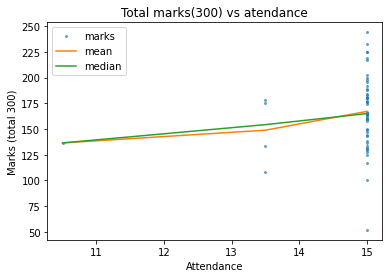

In [0]:
plt.plot(df.Attendance, df.Total300,'o', markersize=2, alpha = 0.6)
plt.plot(df_amean.index, df_amean.Total300)
plt.plot(df_amed.index, df_amed.Total300)
plt.legend(['marks','mean','median'])
plt.title('Total marks(300) vs atendance')
plt.ylabel("Marks (total 300)")
plt.xlabel("Attendance")
plt.show()


In [0]:
#finding the correlation between the two

df.Attendance.corr(df.Total300)

0.1678485661600362

<h3>So, it's not clear about the correlation bw attendance and marks<br>
We can just say that the marks increases slightly as attendance increases.</h3>

In [0]:
df.Observation.corr(df.Total300)

0.10574616113522944

#Base Model

In [0]:
# X = df.loc[:,{'CT1','CT2','CT3','CT4','CTtotal','Observation','Total90','EM1','EM2','Total300'}].as_matrix().astype('float')
# y = (df['Attendance']).ravel()
X = df.loc[:,{'CT1','CT2','CT3','CT4','CTtotal','Observation','Total90','EM1','EM2','Total300'}].to_numpy
y = (df['Attendance']).ravel()

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= 0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

In [0]:
import sklearn
sklearn.__version__